Evaluation of vanilla LightFM models trained on 5 core of Amazon Clothes dataset with hyperparameters:
loss: warp
learning_schedule: 'adadelta'
no_components: 100
Item embeddings were artificially initialized, so that each category was separated.

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.sparse
import seaborn as sns
from tqdm.auto import tqdm

from utils import analyse_metrics, analyse_embeddings, reduce_item_embeddings

In [32]:
tqdm.pandas()
THREADS = 8

In [33]:
epochs = [5, 25, 50, 250, 500, 1000]
models = [pd.read_pickle(f'/pio/scratch/1/i313924/data/lightfm_data/model_{epochs}_epochs_separated_initialization.pkl') for epochs in epochs]
train_interactions = scipy.sparse.load_npz('/pio/scratch/1/i313924/data/lightfm_data/5_core_interactions.npz')
test_interactions = scipy.sparse.load_npz('/pio/scratch/1/i313924/data/lightfm_data/5_core_test_interactions.npz')
dataset = pd.read_pickle('/pio/scratch/1/i313924/data/lightfm_data/5_core_dataset.pkl')

In [34]:
categories = pd.read_json('/pio/scratch/1/recommender_systems/interim/Amazon/meta_Clothing_Shoes_and_Jewelry_categories.json', lines=True)
abx_path = '/pio/scratch/1/recommender_systems/interim/ABX_tests/5_core.json'

In [41]:
item_ids = list(dataset.mapping()[2].keys())
women_ids = categories[(categories.category_1 == "Women") & (categories.asin.isin(item_ids))].asin.values
men_ids = categories[(categories.category_1 == "Men") & (categories.asin.isin(item_ids))].asin.values

PCA prepared
EPOCH: 5
EPOCH: 25
EPOCH: 50
EPOCH: 250
EPOCH: 500
EPOCH: 1000


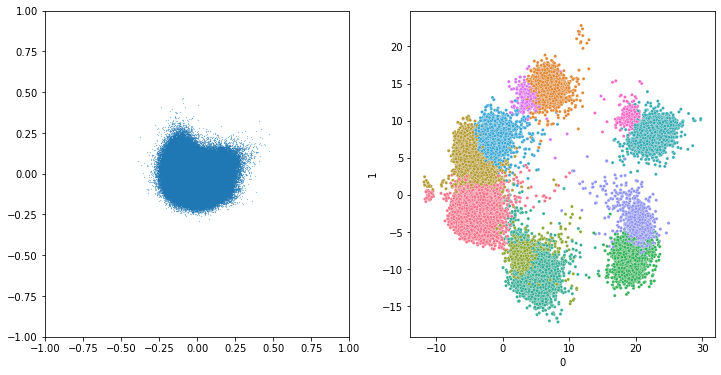

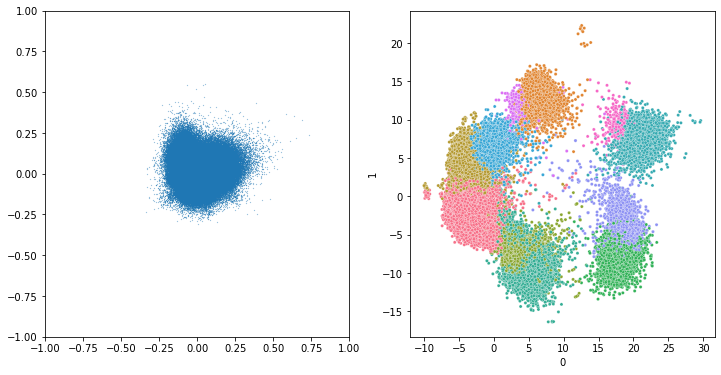

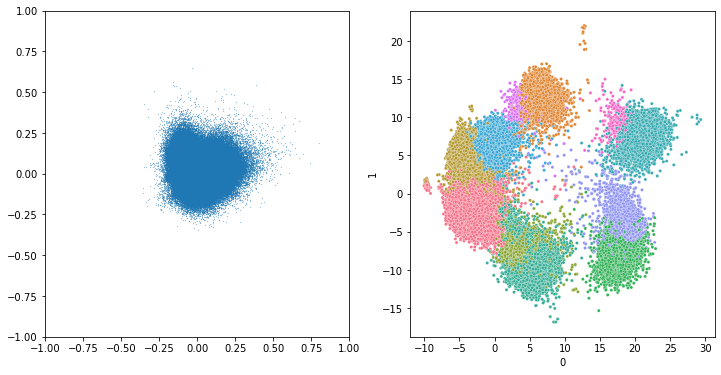

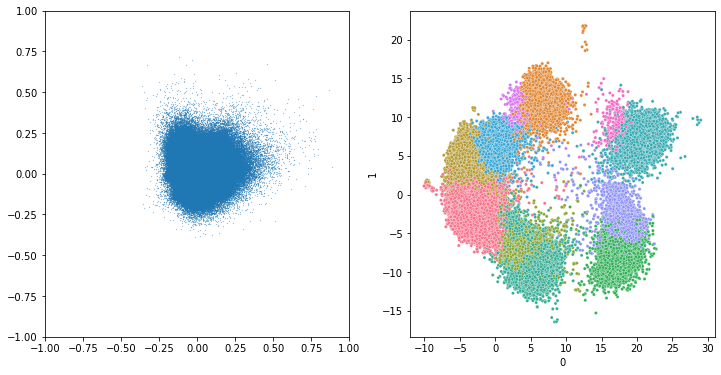

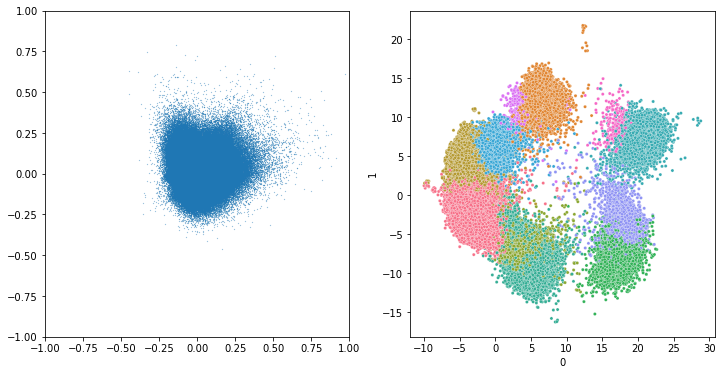

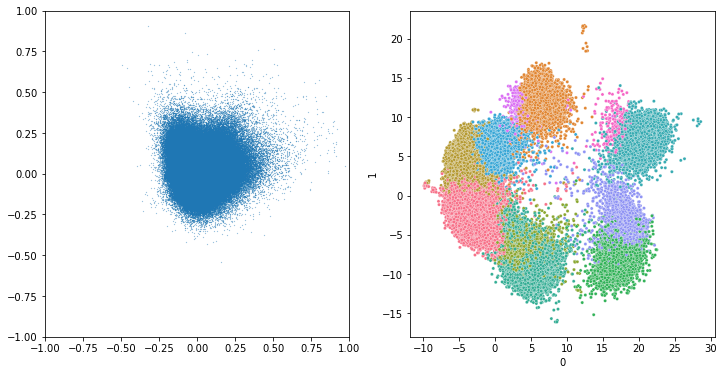

In [42]:
e, c, women_means, men_means, item_pca = analyse_embeddings(epochs, models, dataset, categories, abx_path, women_ids, men_ids)

Eucl dist


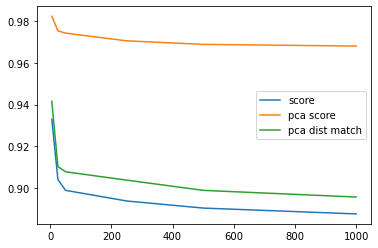

Cos dist


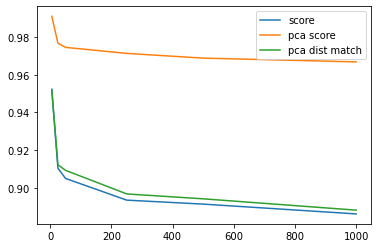

In [43]:
print("Eucl dist")
plt.plot(np.tile(epochs, (3, 1)).T, e)
plt.legend(["score", "pca score", "pca dist match"])
plt.show()
print("Cos dist")
plt.plot(np.tile(epochs, (3, 1)).T, c)
plt.legend(["score", "pca score", "pca dist match"])
plt.show()

In [44]:
e

[[0.933, 0.9824, 0.9416],
 [0.9041, 0.9754, 0.9103],
 [0.8989, 0.9743, 0.9078],
 [0.8938, 0.9706, 0.9038],
 [0.8904, 0.9689, 0.8989],
 [0.8876, 0.9681, 0.8957]]

In [45]:
c

[[0.9523, 0.991, 0.9517],
 [0.9104, 0.9767, 0.9123],
 [0.905, 0.9745, 0.9093],
 [0.8935, 0.9713, 0.8968],
 [0.8914, 0.9688, 0.8942],
 [0.8862, 0.9668, 0.8882]]

In [46]:
tqdm.pandas()
test_hit_rate_scores, test_recall_scores, test_precision_scores = analyse_metrics(models, train_interactions, test_interactions, dataset)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [47]:
test_recall_scores

[0.14634, 0.19426000000000002, 0.2114, 0.23181999999999997, 0.2379, 0.24324]

In [48]:
test_precision_scores

[0.014634000000000001,
 0.019426,
 0.02114,
 0.023181999999999998,
 0.023790000000000002,
 0.024324000000000002]

In [49]:
test_hit_rate_scores

[0.2247, 0.3208, 0.354, 0.4157, 0.4347, 0.4508]

In [50]:
model = models[-1]
reduced_item_embeddings  = reduce_item_embeddings(model, dataset, categories)

In [51]:
reduced_item_embeddings.category_1.value_counts()

Women                                120759
Men                                   56380
Novelty & More                        18989
Girls                                 13115
Costumes & Accessories                 7832
Baby                                   7532
Luggage & Travel Gear                  7524
Boys                                   7392
Shoe, Jewelry & Watch Accessories      2926
Uniforms, Work & Safety                 349
Traditional & Cultural Wear             289
Name: category_1, dtype: int64

<AxesSubplot:xlabel='0', ylabel='1'>

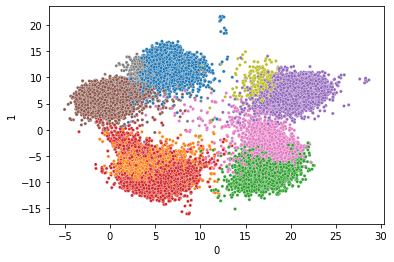

In [52]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[~reduced_item_embeddings['category_1'].isin(['Women', 'Men'])], hue='category_1', s=10, legend=False)

<AxesSubplot:xlabel='0', ylabel='1'>

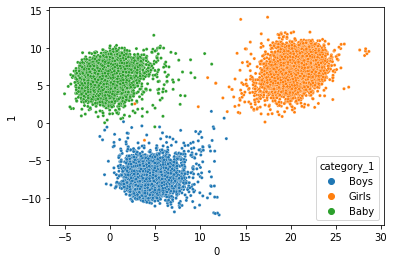

In [53]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Boys', 'Girls', 'Baby'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

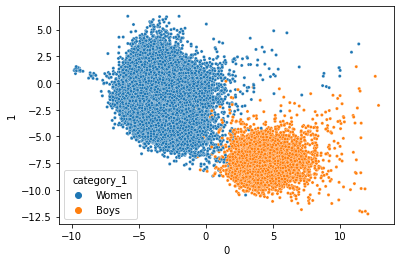

In [54]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Boys', 'Women'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

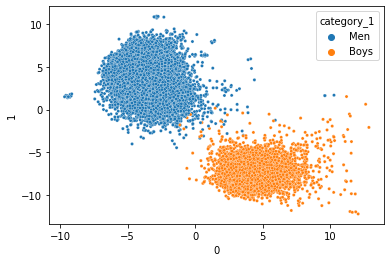

In [55]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Boys', 'Men'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

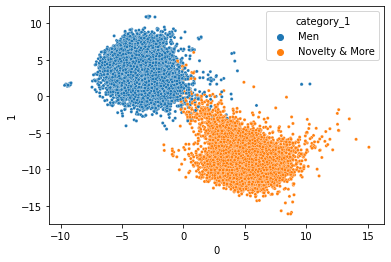

In [56]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Novelty & More', 'Men'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

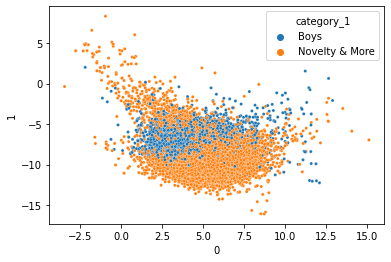

In [57]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Novelty & More', 'Boys'])], hue='category_1', s=10, legend=True)

<AxesSubplot:xlabel='0', ylabel='1'>

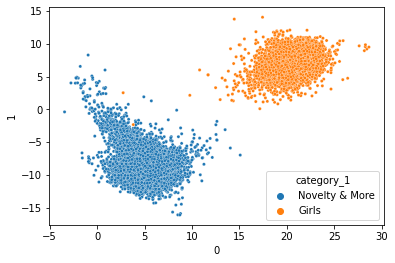

In [58]:
sns.scatterplot(x='0', y='1', data=reduced_item_embeddings[reduced_item_embeddings['category_1'].isin(['Novelty & More', 'Girls'])], hue='category_1', s=10, legend=True)